# background intensity

In [1]:
import sys
import pandas as pd
Yourdir = '/Users/Jacob/Documents/WpenPattern'
sys.path.append(Yourdir)
import WpenPattern.BacDeduct as BacDeduct

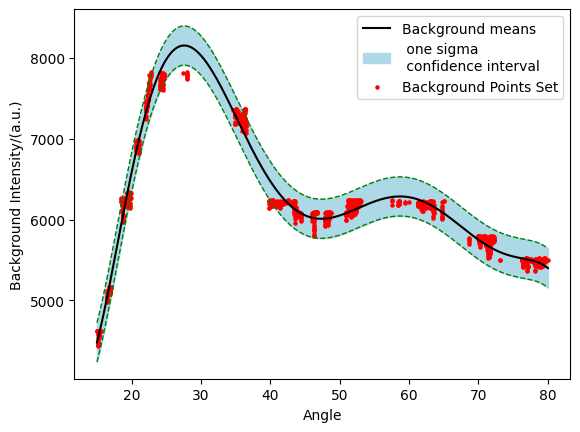

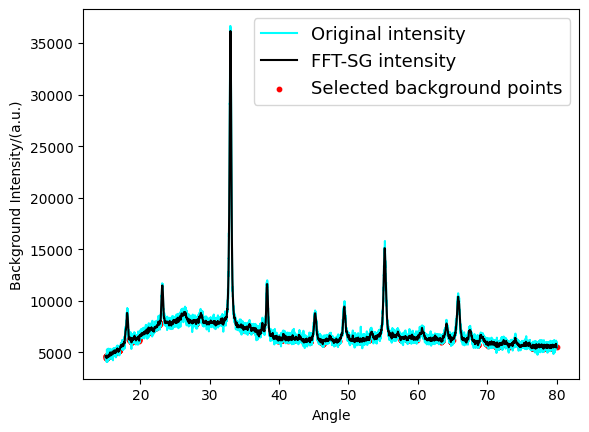

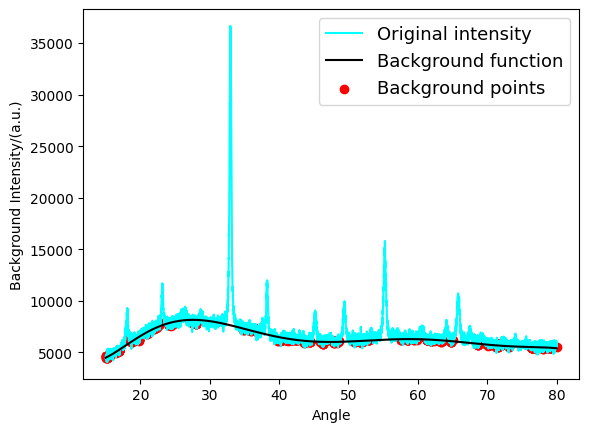

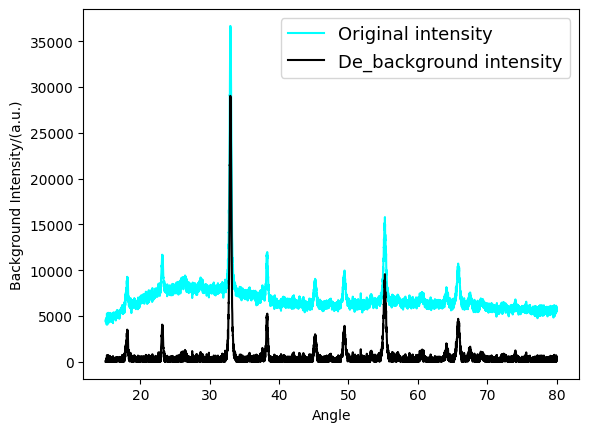

242.17469498502945

<Figure size 640x480 with 0 Axes>

In [3]:
TF = BacDeduct.TwiceFilter()
intensity_csv = pd.read_csv(r'intensity.csv',header=None )
Var = TF.FFTandSGFilter(intensity_csv,lowAngleRange=22,poly_n=8,bac_split=8,bac_num=1000 )
Var

# cal HKL list

In [4]:
import sys
import pandas as pd

import WpenPattern.InitialHKL as xrd

In [5]:
xrd.profile(wavelength='CuKa2').generate('Mn2O3.cif',two_theta_range=(15, 80))

cif file parse complete...
xrd pattern calculate compelete...
There are 24 extinction peaks
result saved at: output_xrd/Mn2O3.csv


# WPEM fitting

Started at Sat Apr 29 10:12:32 2023
WPEM package : Whole Pattern fitting of powder X-ray diffraction by Expectation Maximum  
WPEM V2.0.0, March 2, 2022, MGI, SHU, Shanghai, CHINA.
Reference paper : Doi
------------------------------------------------------------------
Diffraction indexs have been obtained by WPEM
Diffraction indexs have been obtained by WPEM
The input crystal system is: Cubic The initial inputs : 9.411 9.411 9.411 90 90 90
The input crystal system is: Tetragonal The initial inputs : 4.49682 4.49682 3.10491 90 90 90
1-th iterations
[[9.410996122753025, 9.410996122753025, 9.410996122753025, 90, 90, 90], [4.4967347243884435, 4.4967347243884435, 3.10482596844199, 90, 90, 90]]
Rp:4.681    Rwp:6.454    Raquare:6.861
2-th iterations
[[9.410651555586279, 9.410651555586279, 9.410651555586279, 90, 90, 90], [4.496640212261715, 4.496640212261715, 3.1045679936355706, 90, 90, 90]]
Rp:4.331    Rwp:5.711    Raquare:4.271
3-th iterations
[[9.41032327449585, 9.41032327449585, 9.4103232

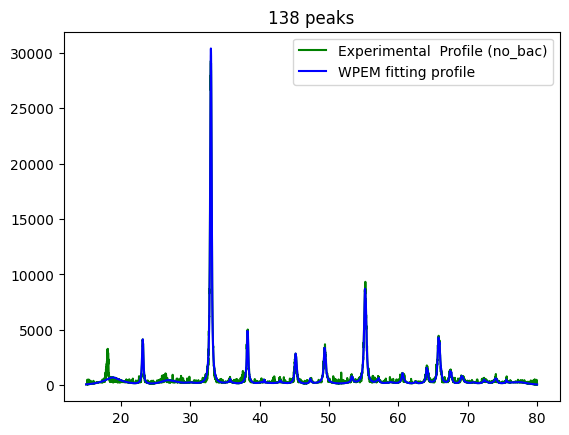

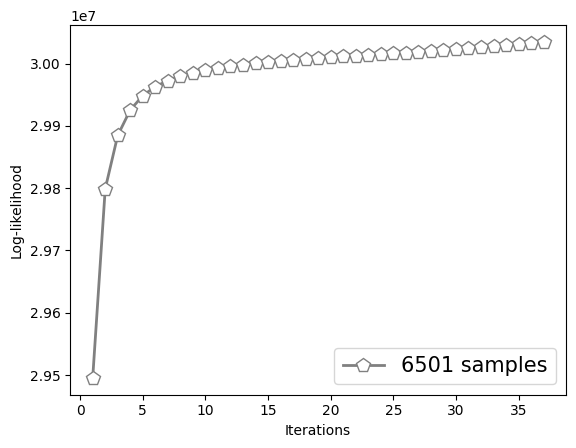

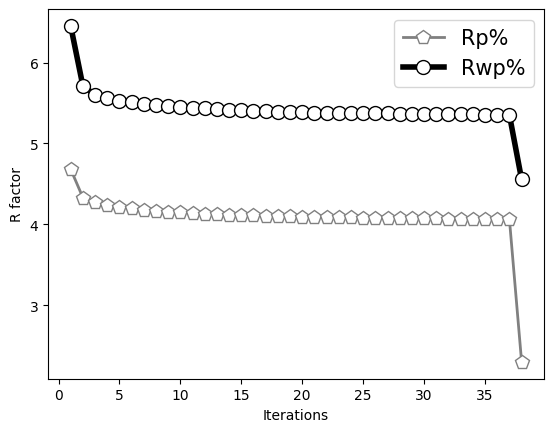

If you want to get the accurately determined of volume fraction 
 Please input the parameter of structure factor!
37-th iterations, reach the limit of ϵ.
 Rp: 2.298
Rwp: 4.555 
WPEM program running time :  0 hours 6 minute  52 second  


<Figure size 640x480 with 0 Axes>

In [7]:
if __name__ == "__main__":

    import WpenPattern.WPEMModel as WPEMModel

    # The wavelength is set according to the actual light source
    wavelength = [1.540593, 1.544414]
    
    # Enter the file name to read on the right side of the equal sign. 
    # Please remember to quote, string.
    
    # The file name of non-background data (2theta-intensity data)
    no_bac_intensity_file = "no_bac_intensity.csv" 
    # The file name of raw/original data (2theta-intensity data)
    original_file = "intensity.csv"  
    # The file name of background data (2theta-intensity data)
    bacground_file = "bac.csv"  


    # Input the initial lattice constants {a, b, c, α, β, γ}, whose values need to be assumed at initialization.
    Lattice_constants = [[9.411, 9.411, 9.411, 90, 90, 90],
                         [4.49682,4.49682,3.10491,90,90,90],]

    # Execute the model
    WPEMModel.Built().fit(
        wavelength, Var, Lattice_constants,no_bac_intensity_file, original_file, bacground_file, 
        subset_number=11,low_bound=19,up_bound=60,bta = 0.85,iter_max = 200,Macromolecule = True, EXACT=True,LogPrint = True,
        num=3,asy_C = 0,cpu=6
        )
 

# amorphous

Convergence get at 3 iterations!
W_list: [38150.06308888]
mu_list: [29.09497962]
sigma2_list: [27.22662633]
interatomic distances : 3.775072
Rp =  19.67452672334609


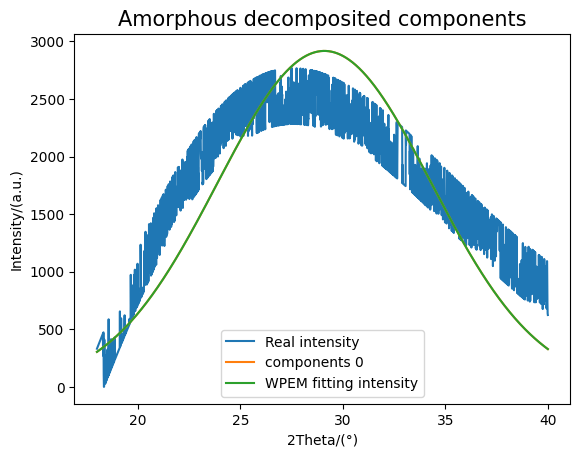

<Figure size 640x480 with 0 Axes>

In [8]:
import WpenPattern.MeasureFunctionGaussianMixture as MGMM
AaZ = MGMM.Amorphous_fit(mix_component = 1, ang_range=(18,40), sigma2_coef = 100, max_iter = 200)

# decompose

Name assigned successfully


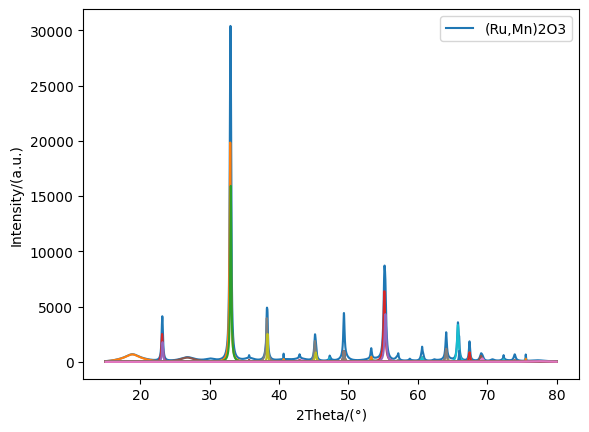

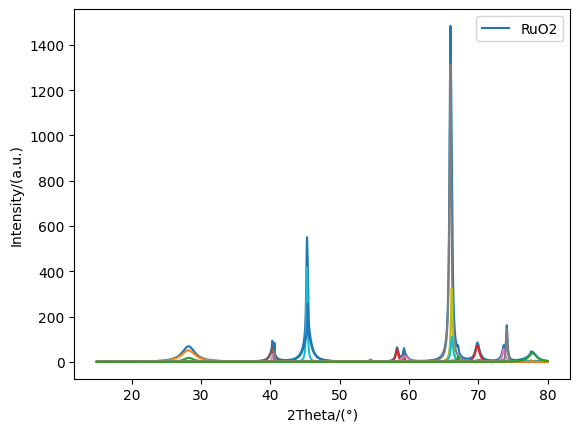

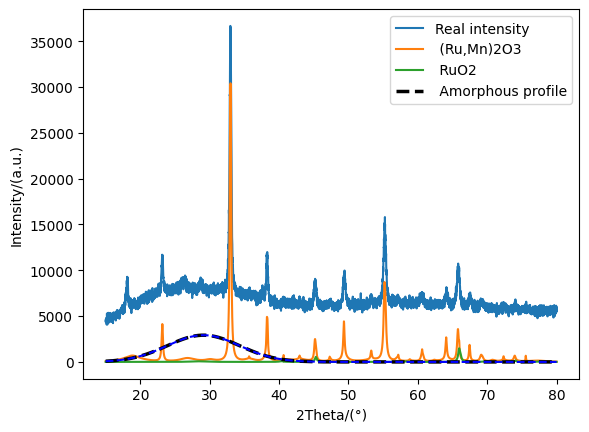

volume fraction estimate in % (calculated by integral area): [95.08793896596265, 4.912061034037355] 
 Saved at the WPEMFittingResults
Relative bulk crystallinity % (calculated by integral area): 92.31255966014135 
 Saved at the WPEMFittingResults


In [10]:
import WpenPattern.Decomposedpeaks as DP
wavelength = [1.540593, 1.544414]
DP.Decomposedpeaks().decomposition_peak(lowboundary=15, upboundary=80,wavelength = wavelength, name = ['(Ru,Mn)2O3','RuO2'],Macromolecule = True,phase=2)